# Parcial 30 sept. ML 2023030

# Ejercicio 4a y 5. EDA y Modelos de ML para Fraud Detection

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Lectura de datos y merge

In [2]:
df=pd.merge(pd.read_csv('train_transaction_new.csv', sep=','),pd.read_csv('train_identity_new.csv', sep=','), on='TransactionID', how='left')

In [3]:
df.shape #Esto nos indica las dimensiones del df

(99999, 434)

In [4]:
df.columns.tolist() # Conozcamos las columnas

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [5]:
df.sample(10) #Hagamos una revision rápida de los que contiene el df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
90029,3077029,0,1884373,17.793,C,15257,375.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37.445,37.445000,37.445,19.652399,19.652399,19.652399,19.652399,19.652399,19.652399,19.652399,17.792601,17.792601,17.792601,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NotFound,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32546,3019546,0,797857,166.

**OBSERVACIONES**

* El df tiene columnas con una importante proporción de *datos nulos*
* Tenemos que trabajar con variables de tipo categóricas y numéricas
* Nuestra *variable objetivo* o *target* es `isFraud`, y es de tipo binaria, compuesta por valores 0 y 1.
* Los nombres de las columnas no requieren procesamiento.

In [6]:
#Conocer qué tipo de datos tiene cada columna en el df
df.dtypes.value_counts()

float64    399
object      31
int64        4
Name: count, dtype: int64

**OBSERVACIONES**

* Tenemos variables de tipo *flotante*, *Entero* y *Object*

In [3]:
#Separo la variable objetivo
y=df['isFraud']
df.drop('isFraud',axis=1, inplace=True)

**OBSERVACIONES**

* En la celda anterior, separamos nuestro `Target` del df y lo guardamos en `y`

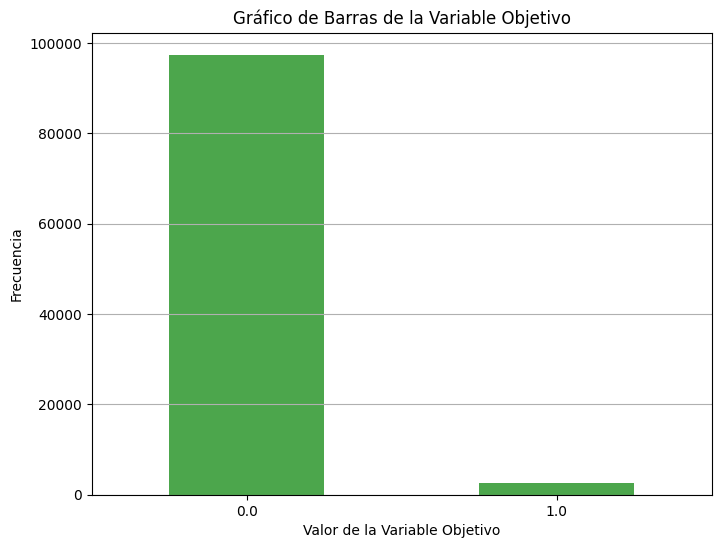

In [54]:
#Hagamos una gráfica para conocer el balance de las categorias

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Valor de la Variable Objetivo')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras de la Variable Objetivo')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario
plt.grid(axis='y')
plt.show()


**OBSERVACIONES**

Esta clase tan **fuertemente desbalanceada** nos va a generar problemas en el modelo final, puesto que va a saber reconocer muy bien las transacciones tipo 0 (*no fraudulentas*), mientras que **no dará buenos resultados** para detectar el fraude, que es lo que finalmente queremos lograr.

Vamos a requerir una tecnica de balance de clases, un *oversampling.*

### MANEJO DE DATOS NULOS

Calculemos el porcentaje de datos nulos de cada columna para poder determinar su manejo más conveniente

In [4]:
porcentaje_nulos=(df.isnull().sum()/len(df))*100
porcentaje_nulos

TransactionID      0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.354014
card3              0.003000
card4              0.007000
card5              0.525005
card6              0.004000
addr1              9.037090
addr2              9.037090
dist1             69.653697
dist2             91.768918
P_emaildomain     15.393154
R_emaildomain     65.453655
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.000000
D2                57.632576
D3                56.597566
D4                46.175462
D5                65.327653
D6                87

Veamos esta información en una gráfica

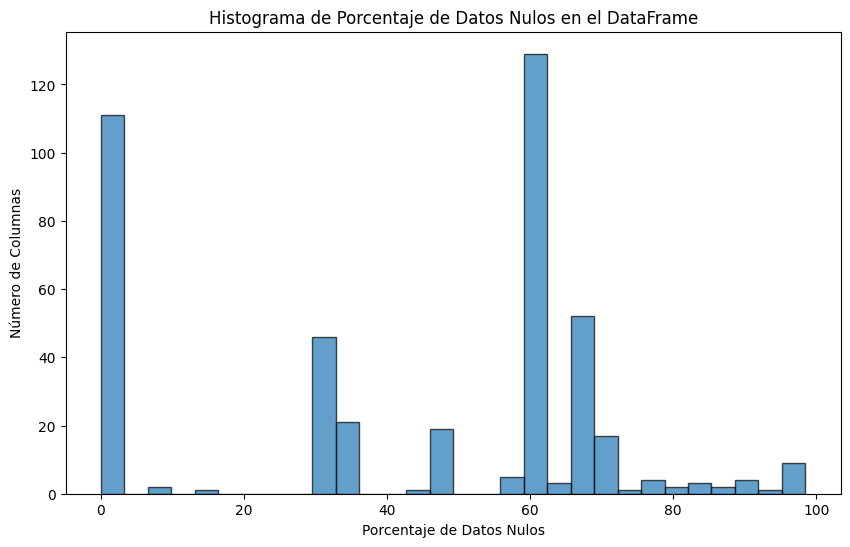

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(porcentaje_nulos, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Porcentaje de Datos Nulos')
plt.ylabel('Número de Columnas')
plt.title('Histograma de Porcentaje de Datos Nulos en el DataFrame')
plt.show()

**CONCLUSION**
* La mayoría de columnas tiene un porcentaje de datos nulos superior al 55%, esto muy importante, porque impilica que alrededor del 50% de los datos de nuestro set serán **'imputados'**.

A continuación vamos a proceder de la siguiente manera:

* Encontrando columnas con datos nulos superiores al 70% para **eliminarlas**

* Encontrando columnas con datos nulos menores al 70% para **imputarlos por la mediana o moda**, según sea su tipo.

In [5]:
#Ciclo para encontrar columnas con porcentaje de nulos >70%
nulos_delete = []
nulos_imputer = []

for i in df.columns:
    if (df[i].isnull().sum() / len(df) * 100) > 70:
        nulos_delete.append(i)
    elif (df[i].isnull().sum() / len(df) * 100) != 0:
        nulos_imputer.append(i)

print('Done!')

Done!


Ya encontramos las columnas con porcentaje de nulos **mayor al 70%*, procedemos a su *eliminación*

In [6]:
#Eliminamos columnas con mas de 70% de nulos
df.drop(nulos_delete,axis=1,inplace=True) 

In [17]:
# nueva dimension del dataframe
df.shape 

(99999, 392)

Para este nuevo `df` vamos ahora a encontrar las columnas con variables **categoricas y numericas** y separarlas para darle un manejo diferente a cada una.

In [7]:
#guardo en una lista las variables categóricas y las numericas para facilitar el preprocesamiento y visualizacion
numericas=(df.select_dtypes(include=['float64','int'])).columns 
categoricas=(df.select_dtypes(include=['object'])).columns

Instanciamos los imputadores para los diferentes tipos de variables. 

Para las variables numéricas usaremos la `mediana` 
Para las variables categoricas usaremos la `la moda`

In [8]:
#Las variables numericas usaremos la mediana para los valores faltantes
#Para las categóricas, la mas frecuente

from sklearn.impute import SimpleImputer

imp_num=SimpleImputer(missing_values=np.nan, strategy='median')
imp_cat=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Aplicamos los imputadores

In [9]:
#Aplicamos los imputadores a los diferentes tipos de datos
df[numericas]= imp_num.fit_transform(df[numericas])
df[categoricas]= imp_cat.fit_transform(df[categoricas])

Verificamos resultados

In [17]:
#Revisamos resultados
df[numericas].sample(10)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_05,id_06,id_11,id_13,id_14,id_17,id_19,id_20
71954,3058954.0,1615367.0,77.00,13597.0,198.0,150.0,226.0,191.0,87.0,9.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,44.0,4.0,66.0,66.0,1.0,182.0,1.0,182.0,182.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,7.0,1.0,18.0,6.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,77.000000,1353.000000,443.000000,77.0,1294.000000,384.0,0.0,59.0,59.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,1.0,20.0,0.0,6.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,77.000000,1394.000000,384.000000,77.0,1394.000000,0.0,384.0,0.000000,110.000000,0.000000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,102450.0,0.0,0.0,100.0,52.0,-300.0,166.0,352.0,391.0
63588,3050588.0,1447363.0,112.99,13964.0,496.0,150.0,224.0,299.0,87.0,9.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,103.0,8.0,0.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

Verificamos resultados

In [18]:
#Revisamos resultados
df[categoricas].sample(10)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,id_12,id_15,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
80452,W,mastercard,debit,anonymous.com,gmail.com,T,T,T,M0,F,F,NotFound,Found,NotFound,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
87512,W,mastercard,debit,gmail.com,gmail.com,T,T,T,M0,F,T,NotFound,Found,NotFound,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
58135,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,T,F,NotFound,Found,NotFound,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
19390,W,visa,debit,gmail.com,gmail.com,T,T,T,M2,T,T,NotFound,Found,NotFound,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
74714,H,visa,credit,anonymous.com,gmail.com,T,T,T,M0,F,F,NotFound,New,NotFound,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
97724,W,visa,credit,aol.com,gmail.com,T,T,T,M0,F,T,NotFound,Found,NotFound,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
62702,C,visa,debit,anonymous.com,anonymous.com,T,T,T,M2,F,F,NotFound,New,NotFound,New,NotFound,mobile safari 11.0,F,F,T,T,mobile,Windows
19388,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,NotFound,Found,NotFound,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
72250,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,NotFound,Found,NotFound,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows
20549,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,T,NotFound,Found,NotFound,Found,Found,chrome 63.0,T,F,T,T,desktop,Windows


De este modo, ya no deberíamos tener valores nulos en nuestro df. Vamos a verificarlo a continuación

In [21]:
#Cantidad de nulos en el dataframe
df.isnull().sum().sum()

0

## VISUALIZACIONES Y ESTADISTICA DESCRIPTIVA

In [20]:
df.describe()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_05,id_06,id_11,id_13,id_14,id_17,id_19,id_20
count,9.999900e+04,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.00000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,999

**OBSERVACIONES**

* De la anterior tabla podemos analizar que muchas de las columnas poseen un valor `promedio` inferior a la `mediana o Q50`, lo que indica que se encuentran sesgadas hacia la derecha, predominando mucho los valores iguales o cercanos al 0 cero

Mas informacion sobre los datos

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 392 entries, TransactionID to DeviceInfo
dtypes: float64(369), object(23)
memory usage: 299.1+ MB


Veamos las distribucionees de algunas de las variables del dataset

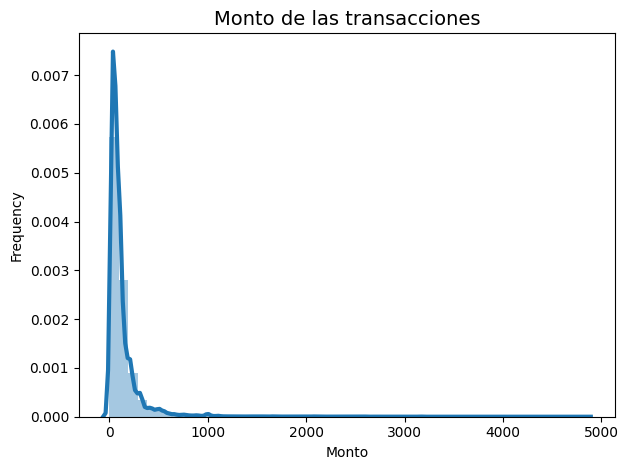

In [22]:
import seaborn as sns

sns.distplot(df['TransactionAmt'], kde_kws={"lw": 3}, bins = 50)
plt.title('Monto de las transacciones',fontsize= 14)
plt.xlabel('Monto')
plt.ylabel('Frequency')
plt.tight_layout()

**OBSERVACIONES**
En relacion a esta variable, se observa una cola larga hacia la derecha, es decir que la distribucion esta sesgada en esta dirección.

Esto significa que la gran mayoría de las transacciones son de bajo monto, mientras que unas pocas superan los 1000.

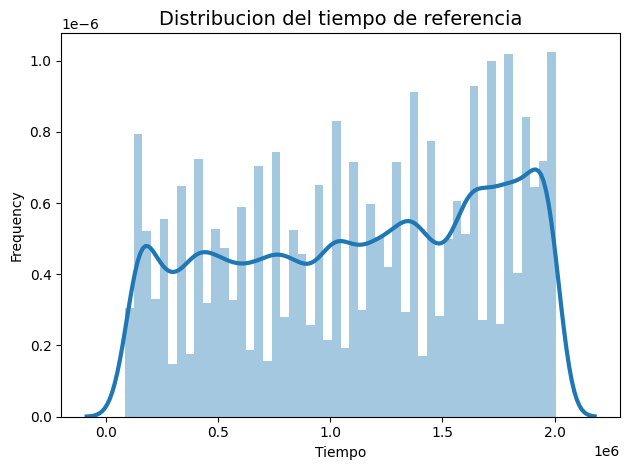

In [23]:
sns.distplot(df['TransactionDT'], kde_kws={"lw": 3}, bins = 50)
plt.title('Distribucion del tiempo de referencia',fontsize= 14)
plt.xlabel('Tiempo')
plt.ylabel('Frequency')
plt.tight_layout()

**OBSERVACIONES**
En relacion a esta variable, no se observan colas, sino una distribución un poco mas uniforme entret los diferntes valores de tiempo, siendo mas comunes aquellas con una duración entre 1.5 y 2.0


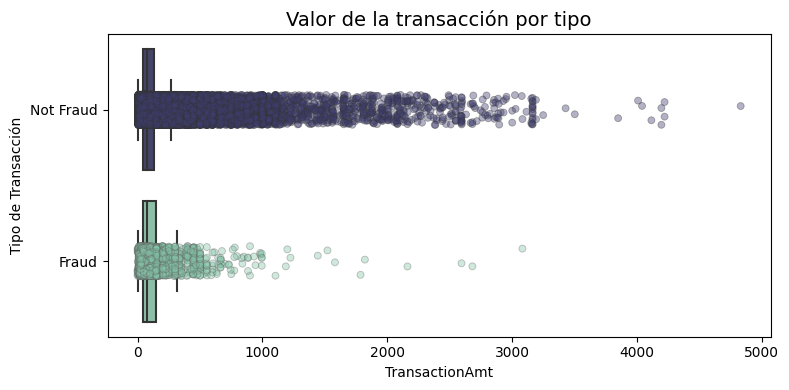

In [24]:
plt.figure(figsize=(8, 4))
sns.stripplot(y = y, x = df['TransactionAmt'], linewidth = 0.6, alpha=0.4, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
sns.boxplot(y = y, x = df['TransactionAmt'], palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
plt.yticks( np.arange(2), ['Not Fraud', 'Fraud'])
plt.title('Valor de la transacción por tipo',fontsize= 14)
plt.ylabel('Tipo de Transacción')
plt.tight_layout()

**OBSERVACIONES**
Las transiciones fraudulentas y no fraudulentas tienen en general valores similares de minimos, maximos y mediana.

Sin embargo, observamos que las Fraudulentas tienen una media menor que las No Fraudulentas.

Las transacciones Fraudulentas suelen ser entonces de bajo monto.

En las transacciones No Fraudulentas podemos observar muchas mas transacciones de alto valor.



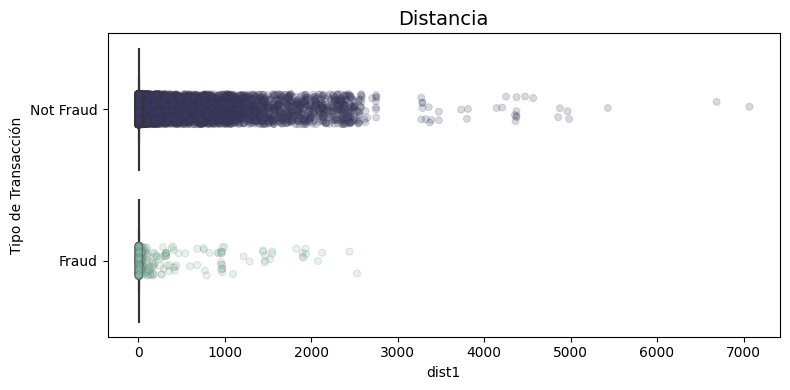

In [25]:
plt.figure(figsize=(8, 4))
sns.stripplot(y = y, x = df['dist1'], linewidth = 0.6, alpha=0.2, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
sns.boxplot(y = y, x = df['dist1'], palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')
plt.yticks( np.arange(2), ['Not Fraud', 'Fraud'])
plt.title('Distancia',fontsize= 14)
plt.ylabel('Tipo de Transacción')
plt.tight_layout()

**OBSERVACIONES** En cuando a la variable `Distancia`, sucede algo similar a lo anterior. 

Mientras que las transacciones no fraudulentas pueden tener muchos valores muy altos, las Fraudulentes son en general de menor valor.

No está muy claro en qué consiste esta variable ni lo que representa. Pero hay una clara diferencia entre las clases.

In [22]:
#agrego la variable respuesta al df para las graficas
df['y']=y

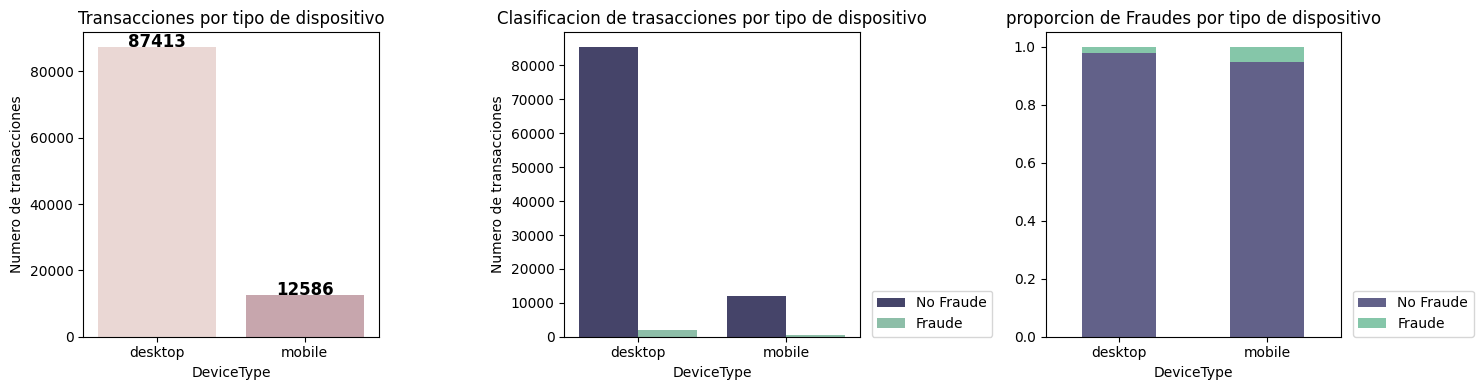

In [27]:
# Visualicemos algunas variables del dataset

fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
ax = sns.countplot(x=df['DeviceType'], palette = ['#eed4d0', '#cda0aa', '#a2708e'], 
                   order = df['DeviceType'].value_counts(sort = False).index)
labels = (df['DeviceType'].value_counts(sort = False))

for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
plt.title('Transacciones por tipo de dispositivo')
plt.ylabel('Numero de transacciones')
plt.tight_layout()

ax2 = fig.add_subplot(132)
sns.countplot(x = df['DeviceType'], hue = y, palette=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Clasificacion de trasacciones por tipo de dispositivo')
plt.ylabel('Numero de transacciones')
plt.legend(( 'No Fraude', 'Fraude'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax3 = fig.add_subplot(133)
d = df.groupby('DeviceType')['y'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax3, color =["#3f3e6fd1", "#85c6a9"])
plt.title('proporcion de Fraudes por tipo de dispositivo')
plt.legend(( 'No Fraude', 'Fraude'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

**OBSERVACIONES**

De la gráfica que la izquierda, podemos saber que existe una importante diferencia entre los tipos de dispositivos utilizados para hacer transferencias. La gran mayoría de los movimientos de dinero se realizan desde un computador (`desktop`).

En la gráfica del medio distinguimos los tipos de equipo utilizados para hacer transferencias fraudulentas, sin embargo, la proporción se aprecia mejor en la gráfica de la derecha, en donde es mucho más claro que los Fraudes se realizan en mayor proporción desde un dispositivo móvil (`mobile`)



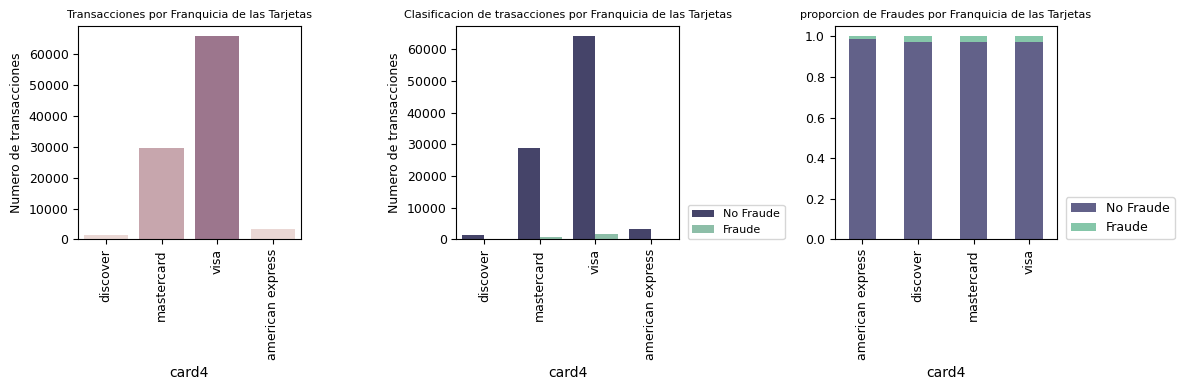

In [28]:
# Visualicemos algunas variables del dataset

fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(131)
ax = sns.countplot(x=df['card4'], palette = ['#eed4d0', '#cda0aa', '#a2708e'], 
                   order = df['card4'].value_counts(sort = False).index)
labels = (df['card4'].value_counts(sort = False))


plt.title('Transacciones por Franquicia de las Tarjetas', fontsize=8)
plt.ylabel('Numero de transacciones', fontsize=9)
_ = plt.xticks(rotation=90,fontsize=9)
_ = plt.yticks(rotation=False,fontsize=9)
plt.tight_layout()

ax2 = fig.add_subplot(132)
sns.countplot(x = df['card4'], hue = y, palette=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Clasificacion de trasacciones por Franquicia de las Tarjetas', fontsize=8)
plt.ylabel('Numero de transacciones', fontsize=9)
plt.legend(( 'No Fraude', 'Fraude'), loc=(1.04,0), fontsize=8)
_ = plt.xticks(rotation=90, fontsize=9)
_ = plt.yticks(rotation=False,fontsize=9)

ax3 = fig.add_subplot(133)
d = df.groupby('card4')['y'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax3, color =["#3f3e6fd1", "#85c6a9"])
plt.title('proporcion de Fraudes por Franquicia de las Tarjetas', fontsize=8)
plt.legend(( 'No Fraude', 'Fraude'), loc=(1.04,0), fontsize=9)
_ = plt.xticks(rotation=90, fontsize=9)
_ = plt.yticks(rotation=False,fontsize=9)

plt.tight_layout()

**OBSERVACIONES**

De la gráfica que la izquierda, podemos saber que existe una importante diferencia entre los tipos de tarjetas utilizadas para hacer transferencias. La gran mayoría de los movimientos de dinero se realizan  con una tarjeta (`visa`), pero también una porción importante se realiza a través de `mastercard`.

En la gráfica del medio distinguimos los tipos de tarjetas utilizados para hacer transferencias fraudulentas, sin embargo, la proporción se aprecia mejor en la gráfica de la derecha, en donde es mucho más claro que los Fraudes se realizan en casi que en igual proporción a las tarjetas `visa`, `mastercard` y `discover`, mientras que aparentemente la más segura es `american express` 

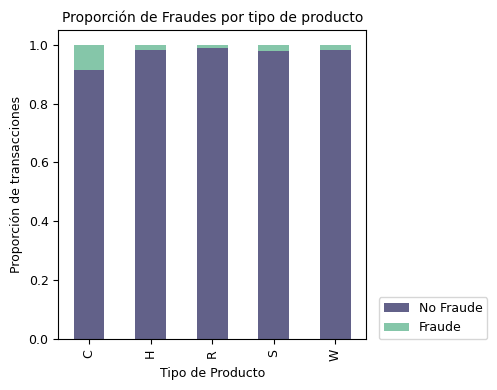

In [29]:
# Visualicemos algunas variables del dataset

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(133)
d = df.groupby('ProductCD')['y'].value_counts(normalize=True).unstack()
d.plot(kind='bar', stacked=True, color=["#3f3e6fd1", "#85c6a9"], ax=ax)
plt.title('Proporción de Fraudes por tipo de producto', fontsize=10)
plt.xlabel('Tipo de Producto', fontsize=9)
plt.ylabel('Proporción de transacciones', fontsize=9)
plt.legend(('No Fraude', 'Fraude'), loc=(1.04, 0), fontsize=9)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


**OBSERVACIONES**
En relación a los tipos de productos, en proporción, la mayoría de los fraudes ocurren en los productos tipo `C` y los que presentan menor proporción son los de tipo `R`

# Analisis Bivariado

En este punto voy a realizar un muestreo del dataset para facilitar el procesamiento a continuación, ya que no se han podido realizar con el dataset completo. Tomaré 5000 filas escogidas aleatoriamente.

In [23]:
df_red=df.sample(5000, random_state=0,axis=0, ignore_index=True )

Realizamos una correlación entre todas las variables numericas

In [24]:
corr = df_red[numericas].corr()  #Realizamos la correlación
corr.shape

(369, 369)

In [32]:
mask = np.zeros_like(corr) #Aplicamos una máscara para facilitar la visualización
mask[np.triu_indices_from(mask)] = True

Visualizamos la matriz de correlación, usamos una escala de colores opuestos que facilite identificar visualmente los valores extremos. Es decir, los que representan correlaciones mas fuertes.

In [33]:
sns.set(font_scale=1.8)
plt.figure(figsize=(100,100))
sns.heatmap(corr, mask=mask, cbar=True, fmt='.1f', annot=False, cmap='coolwarm');

Aunque en general predominan las correlaciones débiles y de valor negativo, existe un importante grupo de variables fuertemente correlacionadas (zonas rojas y azules fuertes). En general las variables `C` y `V` presentan fuertes correlaciones dentro de sus respectivos grupos, es decir, muchas variables `C` se correlacionan entre ellas y muchas variables V se correlacionan entre ellas. No se observa correlación significativa entre variables `C` y `V` 

## One Hot Encoder para variables categóricas

Para implimentar varios de los modelos lineales de ML, es necesario que todas las variables estén en forma numérica y escalada. Para lo cual, procederemos a aplicar la técnica One Hot Encoder para convertir las variables categóricas en columnas de `0` y `1`

In [25]:
df.drop('y',inplace=True, axis=1)

In [10]:
from sklearn.preprocessing import OneHotEncoder

Revisamos ahora las variables categóricas

In [11]:
categoricas

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'id_12', 'id_15', 'id_16', 'id_28',
       'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

En este dataset tenemos columnas con gran cantidad de categorías, las cuales al convertirlas con el OHE nos generarían una maldición de dimensionalidad en nuestra data. 

Para solucionar esto, identifiqué aquellas categorías que tienen una frecuencia inferior al 1% dentro de sus respectivas columnas. A estas categorías les asigné un valor de `Otro`, para que al procesarse queden todos esos valores agrupados en una sola categoría.

In [12]:
categorias_bajas_frecuencia = []
umbral_frecuencia = 1  # Umbral del 1% de frecuencia relativa

for columna in categoricas:
    print(df[columna].value_counts())
    print('---------------------')
    n_cat = df[columna].nunique()  # Número de categorías únicas en la columna
    print('Total de categorias de esta feature:', n_cat)
    print('---------------------')
    if n_cat > 10:
        freq_rel = (df[columna].value_counts() / len(df[columna])) * 100  # Frecuencia relativa en porcentaje
        categorias_bajas_frec = freq_rel[freq_rel < umbral_frecuencia].index.tolist()
        categorias_bajas_frecuencia.extend(categorias_bajas_frec)

print(categorias_bajas_frecuencia)



ProductCD
W    56877
H    15521
R    13724
C    11351
S     2526
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 5
---------------------
card4
visa                65608
mastercard          29599
american express     3330
discover             1462
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 4
---------------------
card6
debit              64926
credit             35063
debit or credit        7
charge card            3
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 4
---------------------
P_emaildomain
gmail.com           51682
yahoo.com           15883
anonymous.com        8663
hotmail.com          8119
aol.com              4866
comcast.net          1856
icloud.com            894
msn.com               852
outlook.com           767
att.net               694
sbcglobal.net         671
verizon.net           626
live.com              501
bellsouth.net         440
cox.net       

En la siguiente línea, hacemos la imputación de la palabra `otro` en todas esos valores que tenían una frecuencia inferior a 1%

In [13]:
for columna in categoricas:
    df[columna] = df[columna].apply(lambda x: 'otro' if x in categorias_bajas_frecuencia else x)

Revisamos ahora como nos quedaron nuestras categorías por columna

In [30]:
'''Agrupando bajo la categoria 'Otro' aquellas categorías con frecuencia relativa del 1% o menor, 
logramos reducir considerablemente la cantidad de columnas que generará el OHE'''
for columna in categoricas:
    print(df[columna].value_counts())
    print('---------------------')
    n_cat = df[columna].nunique()  # Número de categorías únicas en la columna
    print('Total de categorias de esta feature:', n_cat)
    print('---------------------')

ProductCD
W    56877
H    15521
R    13724
C    11351
S     2526
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 5
---------------------
card4
visa                65608
mastercard          29599
american express     3330
discover             1462
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 4
---------------------
card6
debit              64926
credit             35063
debit or credit        7
charge card            3
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 4
---------------------
P_emaildomain
gmail.com        51682
yahoo.com        15883
otro             10786
anonymous.com     8663
hotmail.com       8119
aol.com           4866
Name: count, dtype: int64
---------------------
Total de categorias de esta feature: 6
---------------------
R_emaildomain
gmail.com        78477
anonymous.com     6954
hotmail.com       5422
otro              4597
yahoo.com         3222
ao

Creamos ahora un df que contenga solo las variables categoricas, este es el que pasaremos por el OHE

In [14]:
df_cat=df[categoricas]

Aplicamos el OHE, asegurandonos de configurar la opción `drop=first`, para evitar problemas de *multicolinearidad* entre las nuevas variables

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=True)
encoded_features = encoder.fit_transform(df_cat).toarray()
feature_names = encoder.get_feature_names_out(input_features=df_cat.columns)

# Convertir las características codificadas a un DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Ahora, encoded_df es tu DataFrame con características codificadas
encoded_df.sample(10)



,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_aol.com,P_emaildomain_gmail.com,P_emaildomain_hotmail.com,P_emaildomain_otro,P_emaildomain_yahoo.com,R_emaildomain_aol.com,R_emaildomain_gmail.com,R_emaildomain_hotmail.com,R_emaildomain_otro,R_emaildomain_yahoo.com,M2_T,M3_T,M4_M1,M4_M2,M5_T,M6_T,id_12_NotFound,id_15_New,id_15_Unknown,id_16_NotFound,id_28_New,id_29_NotFound,id_31_chrome 62.0 for android,id_31_chrome 63.0,id_31_chrome 63.0 for android,id_31_firefox 57.0,id_31_ie 11.0 for desktop,id_31_mobile safari 10.0,id_31_mobile safari 11.0,id_31_otro,id_31_safari generic,id_35_T,id_36_T,id_37_T,id_38_T,DeviceType_otro,DeviceInfo_Trident/7.0,DeviceInfo_Windows,DeviceInfo_iOS Device,DeviceInfo_otro
45230,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44550,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29581,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
26656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
886,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3588,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
19536,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9373,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
17107,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
73605,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Una vez realizado lo anterior, procedemos a armar de nuevo nuestra data, uniendo las variables numéricas y las categoricas ya codificadas.

In [16]:
data=pd.concat([df[numericas],encoded_df], axis=1)
data.shape

(99999, 419)

confirmamos entonces que ahora nuestro dataset solo contiene variables numéricas tipo flotantes.

In [34]:
data.dtypes.value_counts() #Confirmado, todas son tipo float

float64    419
Name: count, dtype: int64

### IDENTIFICANDO COLUMNAS ALTAMENTE CORRELACIONADAS CON VIF

La multicolinearidad puede afectar gravemente el desempeño de los modelos lineales, pues uno de sus supuestos es que todas sus variables son independientes entre sí. 

Para garantizar esto, utilizamos la estrategia variance inflation factor(VIF), que consiste en calcular este indicador para cada columna. Si el VIF de una columna es superior a 5, significa que existe multicolinearidad entre esa columna y algunas otras del data set. Entre más alto el valor, mayor es la multicolinearidad de esa columna.

El siguiente codigo, calcula el VIF del dataset, identifica y elimina la columna con el mayor valor VIf y luego recalcula nuevamente los valores para todo el dataset. Este proceso se repite hasta que ninguna columna tenga valor VIF mayor a 5.

**NOTA**

Este proceso para todas las filas del dataset, supera la memoria disponible del equipo, por lo que se hizo necesario ejecutarlo con un data reducido. Para este ejercicio usamos 2000 filas del dataset. Asumiendo que la **multicolinealidad entre las columnas debería manifestarse de forma independiente a la cantidad de filas que se revisen**.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Funcion para calcular el VIF

In [36]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_value'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return vif

Funcion para eliminar la columna con mayor VIF siempre que sea mayor de 5

In [38]:
def eliminacion_vif(vif,df):
  max_vif= vif['VIF_value'].max()
  if max_vif >= 5:
    print('-------------------------')
    idxmax=vif['VIF_value'].idxmax() #Hallar el valor maximo de la columna VIF_Value y traer el indice
    print('eliminamos ',vif.iloc[idxmax, 0],' con VIF de: ', max_vif)
    df.drop((vif.iloc[idxmax, 0]),axis=1, inplace=True)# Con ese indice obtener el "feature" y eliminarlo de dataset
    return True
  else:
    print('-------------------------')
    print('Ya no hay valores vif mayores a 5')
    return False


In [39]:
data.shape

(99999, 419)

Data reducida para poder ejecutar el bucle. Se intentó realizar con la data completa y con submuestras de 10000 y 5000 filas, pero el procesamiento tardaba demasiado. Finalmente se usaron 2000 filas para el calculo.

In [192]:
data_red=data[0:2000] #reduzco filas para agilizar el metodo

Ciclo `while` para hacer la eliminación de columnas con alto VIF en todo el dataset

In [193]:
elimina = True
while elimina:
    vif = calculate_vif(data_red)
    elimina = eliminacion_vif(vif, data_red)
    features=vif.features
    print(vif.head(10))

-------------------------
eliminamos  V27  con VIF de:  inf
         features  VIF_value
0   TransactionID  36.070251
1   TransactionDT  36.822772
2  TransactionAmt   1.457012
3           card1   1.328546
4           card2   1.402610
5           card3  23.498541
6           card5   1.736892
7           addr1   1.252065
8           addr2   2.345609
9           dist1   1.238861
-------------------------
eliminamos  V28  con VIF de:  inf
         features  VIF_value
0   TransactionID  36.086822
1   TransactionDT  36.822772
2  TransactionAmt   1.457012
3           card1   1.328546
4           card2   1.402610
5           card3  23.498541
6           card5   1.736892
7           addr1   1.252065
8           addr2   2.345609
9           dist1   1.238861
-------------------------
eliminamos  V68  con VIF de:  inf
         features  VIF_value
0   TransactionID  36.086503
1   TransactionDT  36.822772
2  TransactionAmt   1.457012
3           card1   1.328546
4           card2   1.402610
5       

capturamos las features o columnas que sobrevivieron a la limpieza VIF

In [253]:
features=vif.features

Las almacenamos en un .csv por seguridad (Por si se resetea el kernel)

In [255]:
vif.to_csv('lastviff.csv', index=False)

In [18]:
vif=pd.read_csv('lastviff.csv',sep=',')

Finalmente definimos nuestro dataset X, con la data obtenida despues del OHE, pero solo con las `features` que sobrevivieron a la prueba VIF

In [19]:
X=data[vif.features]

In [20]:
X.to_csv('X.csv', index=False)

Así quedó el dataset que usaremos para trabajar los modelos de ML

In [21]:
X.shape

(99999, 147)

# EVALUANDO MODELOS DE CLASIFICACION - FRAUDE 

1. KNN
2. Ridge
3. Lasso
4. Naive Bayes
5. XGBoost
6. SVM
7. MLP

creados los dataframes `predictions` y `metrics`, para guardar los resultados arrojados por los modelos.

In [22]:
predictions=pd.read_csv('predictions.csv',sep=',')
metrics=pd.read_csv('metrics.csv', sep=',')

In [261]:
predictions=pd.DataFrame() #Dataframe para guardar las predicciones de los modelos
metrics=pd.DataFrame()


In [23]:
from sklearn.model_selection import train_test_split

Realizamos la partición de los datos de training-validacion y de testing. Nos aseguramos que esta división sea estratificada, ya que, como vimos antes, las clases están desbalanceadas. De esta manera nos aseguramos que la proporción se conserve en las diferentes particiones.

In [24]:
# Debe ser estratificada para que se conserve la proporción entre las clases, que ya verificamos que están desbalanceadas
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, stratify=y, random_state=66)


### OVERSAMPLING

Para compensar el fuerte desbalance entre las clases, aplicamos Oversampling con diferentes tecnicas: 
Para este examen, probamos la técnica `SMOTE`, `RandomOverSampler`, y `ADASYN`.

La que nos dió mejores resultados con el modelo KNN fue la `ADASYN`. Por lo que preferí dejar el analisis realizado con esta tecnica.

*NOTA* Esta tecnica de oversampling la aplicamos solamente al set de training-validación, y no tocamos la partición de prueba.

In [35]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

#smote=SMOTE(random_state=42)
#ros=RandomOverSampler(random_state=42)
adasyn = ADASYN(random_state=42)

In [36]:
#X_trainval_resampled, y_trainval_resampled=smote.fit_resample(X_trainval,y_trainval)
#X_trainval_resampled, y_trainval_resampled=ros.fit_resample(X_trainval,y_trainval)
X_trainval_resampled, y_trainval_resampled=adasyn.fit_resample(X_trainval,y_trainval)

Luego de la tecnica oversampling, lógicamente el tamaño de nuestra data aumentó.

In [37]:
X_trainval_resampled.shape

(146460, 147)

Probemos la efectividad de la tecnica, graficando nuevamente las clases.

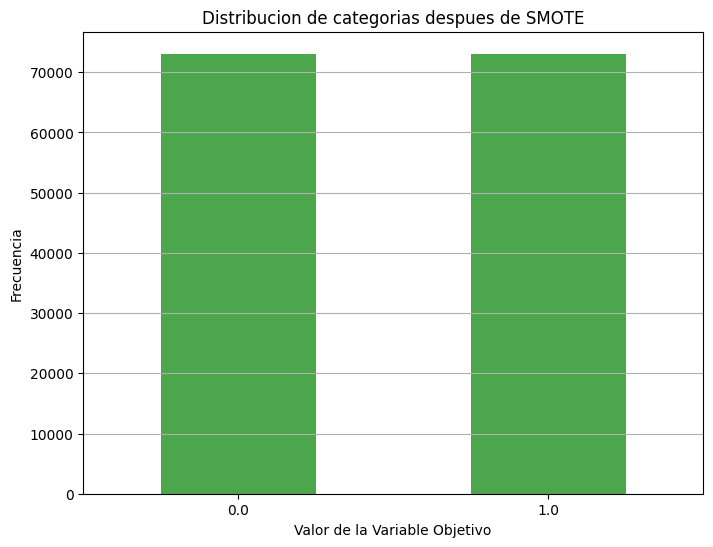

In [267]:
#Hagamos una gráfica para conocer el nuevo balance de las categorias

plt.figure(figsize=(8, 6))
y_trainval_resampled.value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Valor de la Variable Objetivo')
plt.ylabel('Frecuencia')
plt.title('Distribucion de categorias despues de ADASYN')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario
plt.grid(axis='y')
plt.show()

Ya estamos listos para empezar a entrenar los modelos.

## Modelo KNN - Clasificador

In [31]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

Instanciamos *el modelo*, *el escalador*, *el gridsearchCV* y el *Pipeline* a utilizar.

In [306]:
model='K-NN' #Esto es para la tabla final de metricas
clf = KNeighborsClassifier()
escaler= MinMaxScaler()
param_grid = {'clf__n_neighbors': [5,10]}
pipe = Pipeline([('escaler', escaler ), ('clf',clf)])
grid = GridSearchCV(pipe, param_grid, cv=5)

In [307]:
grid.fit(X_trainval_resampled, y_trainval_resampled) #Con ros

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('escaler', MinMaxScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [5, 10]})

In [314]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(grid.score(X_trainval_resampled, y_trainval_resampled)))

Best params:
{'clf__n_neighbors': 5}

Best cross-validation score: 0.97
Test-set score: 0.94
Train-set score: 0.99


Estas metricas nos indican que este modelo tiene un **accuracy muy alto**, es decir que la proporcion de preducciones correctas vs las totales, es muy buena.

Sin embargo, para el objetivo del estudio, debemos mirar **mas a fondo**, ya que queremos ver el rendimiento de este modelo **respecto a cada clase**. En particular nos interesa detectar las transacciones *realmente fraudulentas*, es decir, el modelo que queremos debería ser muy bueno para predecir la `clase 1`.

### Evaluando el modelo

In [275]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,auc
from sklearn.metrics import precision_score, recall_score,roc_auc_score,f1_score

In [330]:
#predicciones
predictions['KNNcls']=grid.predict(X_test)
y_pred=predictions.KNNcls
y_score=grid.predict_proba(X_test)[:, 1]
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred) 
fscore=f1_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.T

In [356]:
# funcion para matriz de confusion
import seaborn as sns
def confusion_matriz(cm):
    labels = ['Clase {}'.format(i) for i in range(cm.shape[0])]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Verdaderos')
    plt.title('Matriz de Confusión Modelo ')
    plt.show()  # Agrega esta línea si deseas mostrar la gráfica inmediatamente


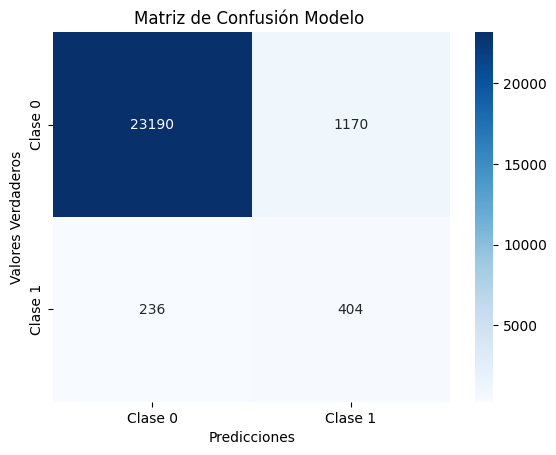

In [357]:
confusion_matriz(cm)

In [358]:
report=classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     24360
         1.0       0.26      0.63      0.36       640

    accuracy                           0.94     25000
   macro avg       0.62      0.79      0.67     25000
weighted avg       0.97      0.94      0.96     25000



**ANALISIS**

* Viendo esta matriz es facil entender por qué el modelo nos arroja una alta accuracy, puesto que en la diagonal principal podemos encontrar que la mayoría de las predicciones son correctas, sin embargo, *teniendo en cuenta que nuestro dataset con los datos originales esta desequilibrado*, era de esperarse que el modelo fuera muy bueno para predecir la clase mayoritaria `clase 0`. Las predicciones de la `clase 1` aun no son muy buenas, hay muchos Falsos Positivos, sin embargo, para efectos monetarios, podemos decir que el modelo es *seguro*

* Sin embargo, nuestro objetivo es predecir la `clase 1`, y dentro de estas predicciones (que no son tan precisas), para el negocio bancario, es importante **minimizar** los *Falsos Negativos*. Es decir, transacciones que el modelo clasifica como `No Fraudulentas` **pero que en realidad sí lo son**, económicamente esto es catastrófico y ocasionadira pérdidas de dinero.

* Por otro lado, los *Falsos Positivos* tampoco son deseados (y estan bastante altos) pero sus consecuencias **no serían tan graves**, pues se podría implementar verificaciones por parte del usuario para confirmar una transaccion sospechosa.

**CONCLUSION**
* Teniendo en cuenta todo lo anterior, en este caso necesitamos enfocarnos en el `recall` para la **clase 0**.
Puesto que un falso negativo podría costar **Dinero**, mientras que muchos Falsos positivos, genera un modelo paranoico, su consecuencia sería incomodar a los clientes. Peca por demasiado prevenido. En este sentido, podemos decir que el modelo funciona muy bien, puesto que Recall de la clase 0 es 95.

In [359]:
#Visualizacion Curva ROC
def grafico_curvaROC (fpr, tpr,roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

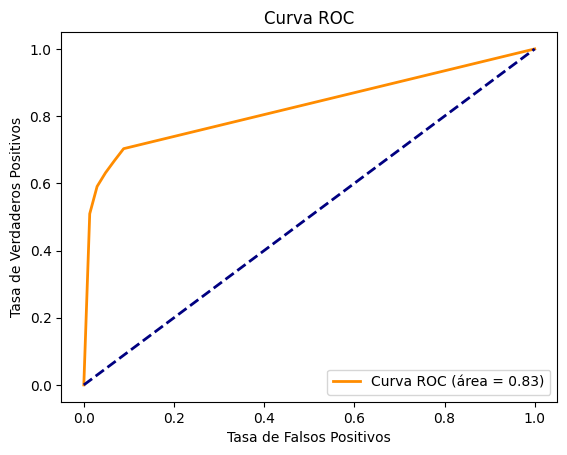

In [360]:
grafico_curvaROC(fpr,tpr,roc_auc)

**INSIGHTS**
La curva ROC muestra que la tasa de Verdaderos positivos es inferior al 80%, el área bajo la curva sin embargo, es 0.83/1, lo cual no es un mal resultado general.

## MODELO RIDGE

In [361]:
from sklearn.linear_model import RidgeClassifier

Instanciamos el modelo definimos el gridsearchCV y el pipeline para el proceso. 
Usamos los parámetros `alpha` (fuerza de la regularización) y `max_iter`

In [362]:
model='Ridge' #Esto es para la tabla final de metricas
ridge_clas = RidgeClassifier()
escaler= StandardScaler()
param_grid = {'ridge_clas__alpha': [0.01, 1, 10],
              'ridge_clas__max_iter':[20,50]}
pipe = Pipeline([('escaler', escaler ), ('ridge_clas',ridge_clas)])
grid = GridSearchCV(pipe, param_grid, cv=5)

Entrenamos el modelo

In [363]:
grid.fit(X_trainval_resampled, y_trainval_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('escaler', StandardScaler()),
                                       ('ridge_clas', RidgeClassifier())]),
             param_grid={'ridge_clas__alpha': [0.01, 1, 10],
                         'ridge_clas__max_iter': [20, 50]})

In [364]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(grid.score(X_trainval_resampled, y_trainval_resampled)))

Best params:
{'ridge_clas__alpha': 1, 'ridge_clas__max_iter': 20}

Best cross-validation score: 0.79
Test-set score: 0.79
Train-set score: 0.79


Revisamos los mejores parámetros encontrados para el modelo, los cuales nos ofrecieron un score regular en la validación cruzada, y tanto en los sets de training y testing.  Como sabemos, por lo descrito anteriormente, no podemos juzgar el modelo a prior, solo con estos datos, vamos a mirar un poco mas a detalle como funciona y si es bueno o no para lo que nos interesa, que es la predicción correcta de la `clase 0`. Es decir, la tasa de *Falsos Negativos*.

### Evaluando el modelo

Acumulamos las predicciones en el df predictions y lo guardamos como .csv para asegurarlo en caso que falla del sistema.
Además calculamos las métricas solicitadas y las almacenamos en el df metrics.

In [368]:
predictions['Ridge']=grid.predict(X_test)
y_pred=predictions.Ridge
y_score=grid.decision_function(X_test)
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred) 
fscore=f1_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.T

,precission,recall,f1_score,auc_score
K-NN,0.256671,0.631250,0.364950,0.826935
Ridge,0.086051,0.729688,0.153948,0.845046


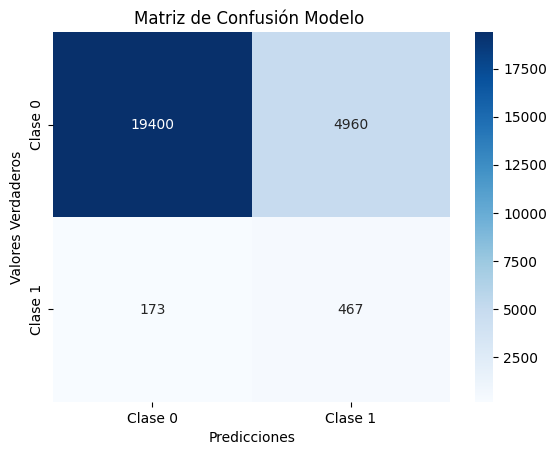

In [369]:
confusion_matriz(cm)

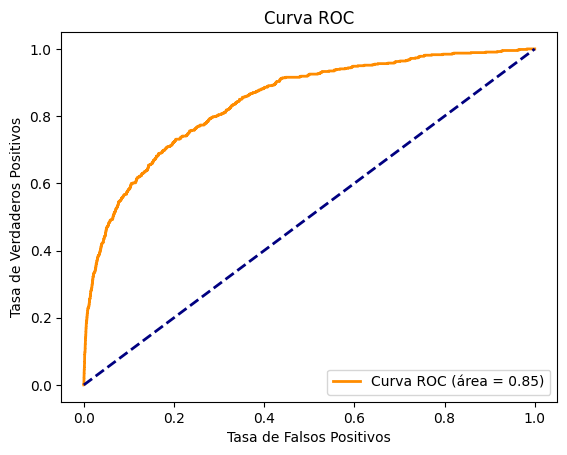

In [370]:
grafico_curvaROC(fpr,tpr,roc_auc)

In [371]:
report=classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.88     24360
         1.0       0.09      0.73      0.15       640

    accuracy                           0.79     25000
   macro avg       0.54      0.76      0.52     25000
weighted avg       0.97      0.79      0.86     25000



Este modelo muestra una ligera mejoría en cuando al área bajo la curva, y demostrando mejor habilidad para predecir la clase 1 en detrimento de la predicción de la clase 0.

Para nuestro propósito, no resulta muy conveniente que se aumenten los falsos negativos, por lo que la disminución en el recall de la clase 0, genera pérdidas para la empresa.

## MODELO LASSO - Regresión Logística con Regularización L1

Para los problemas de clasificación binaria, no está definido un modelo LASSO, sino que utilizamos la Regresion Logística y le aplicamos un parámetro de regularización L1, es decir, tipo LASSO.

En este caso, además, usamos como parámetro para medir el inverso de la fuerza de la regularización el parámetro `C`, y probamos 2 tipos de `solver`


In [372]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

In [373]:
model='Lasso(LoReg)' #Esto es para la tabla final de metricas
lasso_clas = LogisticRegression(penalty='l1') # Aplicamos la regularizacion LASSO
escaler= StandardScaler()
param_grid = {'lasso_clas__C': [0.01, 1, 10],
              'lasso_clas__solver':['lbfgs','saga']}
pipe = Pipeline([('escaler', escaler ), ('lasso_clas',lasso_clas)])
grid = GridSearchCV(pipe, param_grid, cv=5)

In [374]:
grid.fit(X_trainval_resampled, y_trainval_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('escaler', StandardScaler()),
                                       ('lasso_clas',
                                        LogisticRegression(penalty='l1'))]),
             param_grid={'lasso_clas__C': [0.01, 1, 10],
                         'lasso_clas__solver': ['lbfgs', 'saga']})

In [228]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(grid.score(X_trainval_resampled, y_trainval_resampled)))

Best params:
{'lasso_clas__C': 1, 'lasso_clas__solver': 'saga'}

Best cross-validation score: 0.80
Test-set score: 0.82
Train-set score: 0.81


En comparación a los demás, este modelo  nos arroja mejores valores generales de accuracy, siendo los del testing, incluyo mayores a los del training

### Evaluando el modelo

In [230]:
predictions['Lasso_LoReg']=grid.predict(X_test) #Hacemos predicciones y las guardamos en los df
y_pred=predictions.Lasso_LoReg
y_score=grid.decision_function(X_test)
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred) 
fscore=f1_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True) #Calculamos metricas y las guardamos en los df
metrics.to_csv('metrics.csv',index=True)
metrics.T

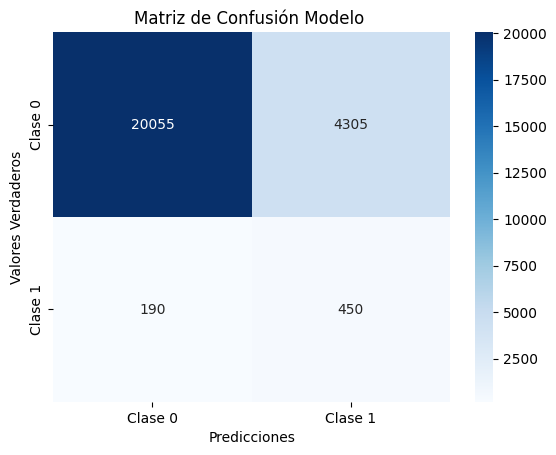

In [232]:
confusion_matriz(cm)

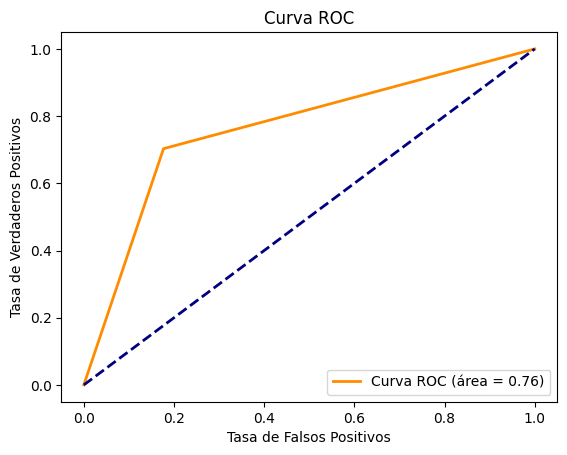

In [233]:
grafico_curvaROC(fpr,tpr,roc_auc)

## MODELO NAIVE BAYES

In [386]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [387]:
model='NaiveBayes' #Esto es para la tabla final de metricas
nb= GaussianNB()
score_cv= cross_val_score(nb, X_trainval_resampled,y_trainval_resampled,cv=5, scoring='accuracy' )
nb.fit(X_trainval_resampled,y_trainval_resampled)

GaussianNB()

### Evaluando el modelo

In [394]:
predictions['NaiveBayes']=nb.predict(X_test)
y_pred=predictions.NaiveBayes
y_score=nb.predict_proba(X_test)[:,1]
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred) 
fscore=f1_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.to_csv('metrics.csv',index=True)
metrics.T

,precission,recall,f1_score,auc_score
K-NN,0.256671,0.631250,0.364950,0.826935
Ridge,0.086051,0.729688,0.153948,0.845046
Lasso(LoReg),0.093852,0.715625,0.165942,0.847390
NaiveBayes,0.030398,0.756250,0.058447,0.643038


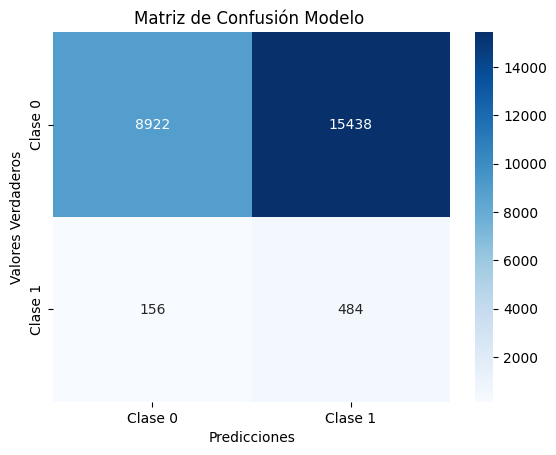

In [395]:
confusion_matriz(cm)

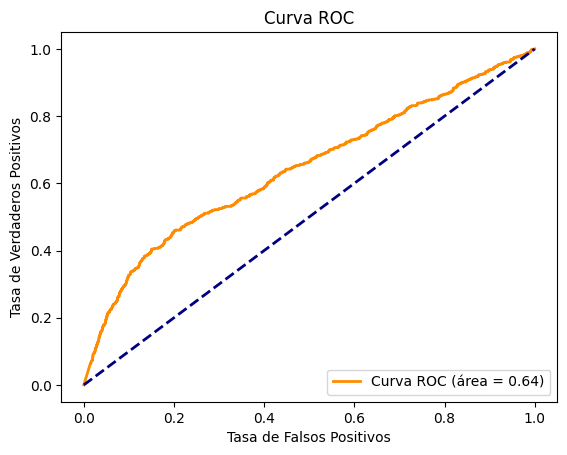

In [396]:
grafico_curvaROC(fpr,tpr,roc_auc)

In [397]:
report=classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.37      0.53     24360
         1.0       0.03      0.76      0.06       640

    accuracy                           0.38     25000
   macro avg       0.51      0.56      0.30     25000
weighted avg       0.96      0.38      0.52     25000



## MODELO XGBoost 

In [398]:
from xgboost import XGBClassifier

In [399]:
model='XGBoost' #Esto es para la tabla final de metricas
xgb= XGBClassifier()
escaler= StandardScaler()
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [3, 4, 5]
}
pipe = Pipeline([('escaler', escaler ), ('xgb',xgb)])
grid = GridSearchCV(pipe, param_grid, cv=5)

In [400]:
grid.fit(X_trainval_resampled, y_trainval_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('escaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=N...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.01, 0.1],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [100, 200, 300]})

In [401]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(grid.score(X_trainval_resampled, y_trainval_resampled)))

Best params:
{'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 300}

Best cross-validation score: 0.99
Test-set score: 0.98


Train-set score: 0.99


In [383]:
predictions['XGBoost']=grid.predict(X_test)
y_pred=(predictions.XGBoost).astype(int)
predictions.to_csv('predictions.csv', index=False)

### Evaluando el modelo

In [402]:
predictions['XGBoost']=grid.predict(X_test)
y_pred=predictions.XGBoost
y_score=grid.predict_proba(X_test)[:,1]
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred) 
fscore=f1_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics['XGBoost']=[precission,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.to_csv('metrics.csv',index=True)
metrics.T

,precission,recall,f1_score,auc_score
K-NN,0.256671,0.631250,0.364950,0.826935
Ridge,0.086051,0.729688,0.153948,0.845046
Lasso(LoReg),0.093852,0.715625,0.165942,0.847390
NaiveBayes,0.030398,0.756250,0.058447,0.643038
XGBoost,0.893617,0.393750,0.546638,0.910266


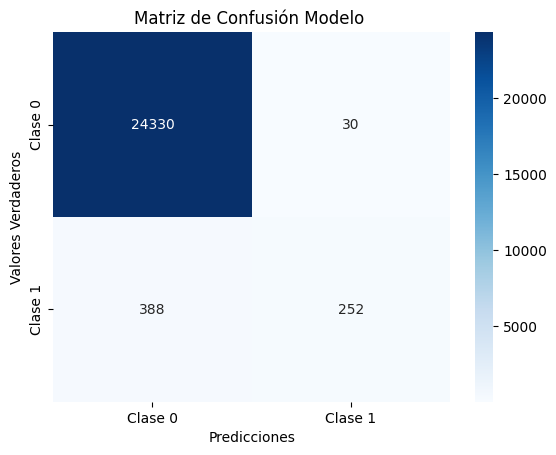

In [403]:
confusion_matriz(cm)

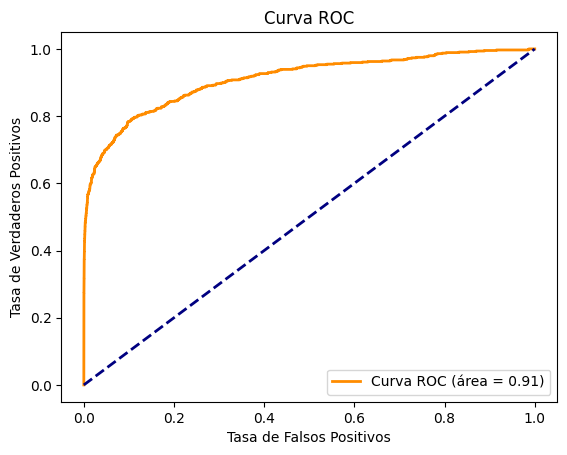

In [404]:
grafico_curvaROC(fpr,tpr,roc_auc)

In [405]:
report=classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     24360
         1.0       0.89      0.39      0.55       640

    accuracy                           0.98     25000
   macro avg       0.94      0.70      0.77     25000
weighted avg       0.98      0.98      0.98     25000



## MODELO SVM

In [32]:
from sklearn.svm import SVC

In [33]:
model='SVM' #Esto es para la tabla final de metricas
svc= SVC(kernel='rbf')
escaler= MinMaxScaler()
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 1]
}
pipe = Pipeline([('escaler', escaler ), ('svc',svc)])
grid_svc = GridSearchCV(pipe, param_grid, cv=5)

In [38]:
grid_svc.fit(X_trainval_resampled, y_trainval_resampled)

: 

In [ ]:
import joblib
mejor_svm = grid.best_estimator_
joblib.dump(mejor_svm, 'SVM_fraud.pkl')

In [ ]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(grid.score(X_trainval_resampled, y_trainval_resampled)))

Best params:
{'lasso_clas__C': 1, 'lasso_clas__solver': 'saga'}

Best cross-validation score: 0.80
Test-set score: 0.81
Train-set score: 0.80


### Evaluando el modelo

In [ ]:
predictions['SVM']=grid.predict(X_test)
y_pred=predictions.SVM
y_score=grid.decision_function(X_test)
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred) 
fscore=f1_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.to_csv('metrics.csv',index=True)
metrics.T

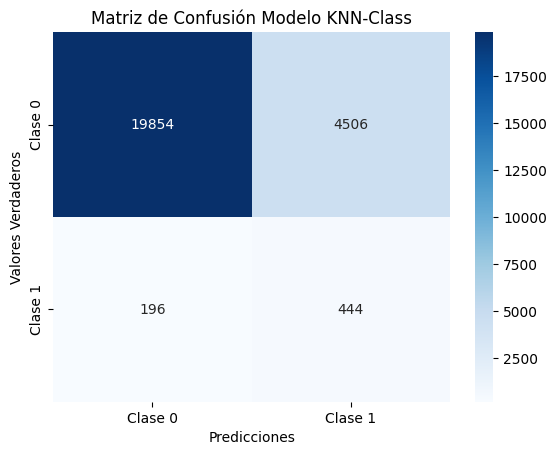

In [ ]:
confusion_matriz(cm)

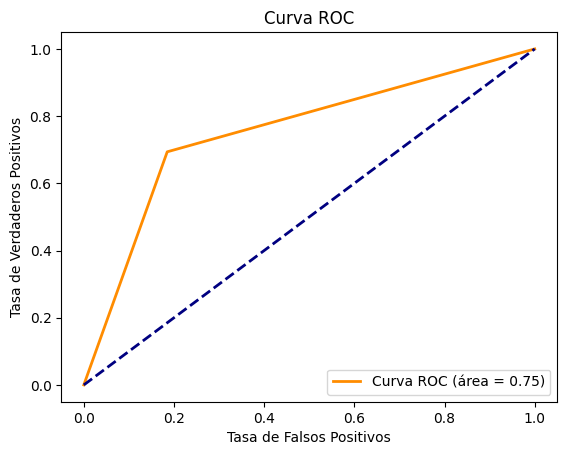

In [ ]:
grafico_curvaROC(fpr,tpr,roc_auc)

In [ ]:
report=classification_report(y_true=y_test, y_pred=y_pred)
print(report)

## MODELO MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model='MLP' #Esto es para la tabla final de metricas
mlp= MLPClassifier()
escaler= StandardScaler()
param_grid = {
    'mlp__hidden_layer_sizes': [50,100],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
}
pipe = Pipeline([('escaler', escaler ), ('mlp',mlp)])
grid = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:
grid.fit(X_trainval_resampled, y_trainval_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('escaler', StandardScaler()),
                                       ('lasso_clas',
                                        LogisticRegression(penalty='l1'))]),
             param_grid={'lasso_clas__C': [0.01, 1, 10],
                         'lasso_clas__solver': ['lbfgs', 'saga']})

In [ ]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Train-set score: {:.2f}".format(grid.score(X_trainval_resampled, y_trainval_resampled)))

Best params:
{'lasso_clas__C': 1, 'lasso_clas__solver': 'saga'}

Best cross-validation score: 0.80
Test-set score: 0.81
Train-set score: 0.80


In [ ]:
predictions['MLP']=grid.predict(X_test)
y_pred=(predictions.MLP).astype(int)
predictions.to_csv('predictions.csv', index=False)

### Evaluando el modelo

In [ ]:
predictions['MLP']=grid.predict(X_test)
y_pred=predictions.MLP
y_score=grid.predict_proba(X_test)[:,1]
predictions.to_csv('predictions.csv', index=False)

#metricas
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
precission=precision_score(y_true=y_test, y_pred=y_pred)
recall=recall_score(y_true=y_test, y_pred=y_pred) 
fscore=f1_score(y_true=y_test, y_pred=y_pred)
auc_score=roc_auc_score(y_true=y_test, y_score=y_score)

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
roc_auc = auc(fpr, tpr)

#creando el dataset de metricas
metrics[model]=[precission,recall,fscore,auc_score] #Guarda en df de metricas
metricas=['precission','recall','f1_score','auc_score']
metrics.set_index(pd.Index(metricas), inplace=True)
metrics.T

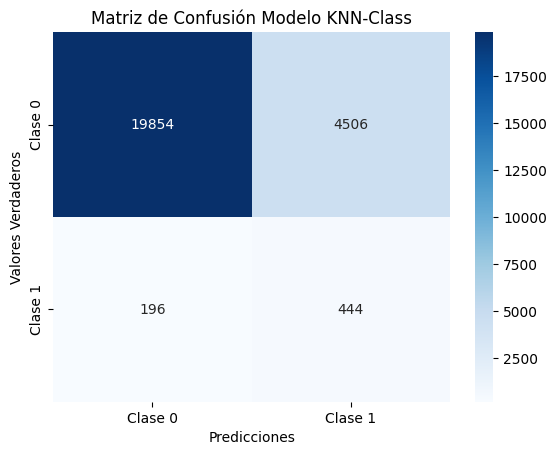

In [ ]:
confusion_matriz(cm)

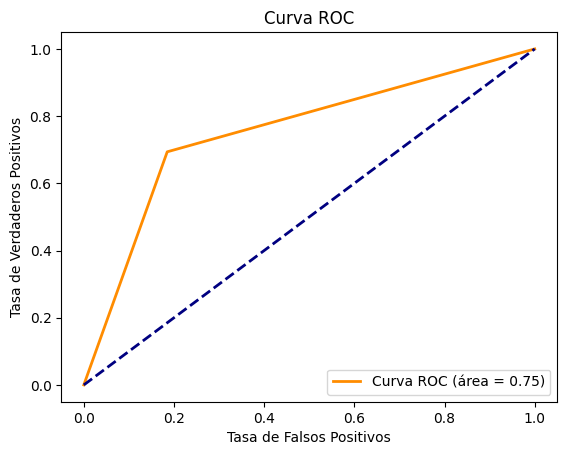

In [ ]:
grafico_curvaROC(fpr,tpr,roc_auc)

In [ ]:
report=classification_report(y_true=y_test, y_pred=y_pred)
print(report)

Una vez entrenados y evaluados los modelos, escojamos el mejor a partir de la Métrica AUC

In [ ]:
metrics.T

El mejor modelo para clasificar transacciones fraudulentas es: